# СЕ. Лабораторная работа №2.

![img](Home\Documents\Универ\СЕ\Img1.png)

In [98]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import math

In [99]:
ug, ig, uz = 5, 6, 10

In [100]:
def f(u):
    global kappa
    if kappa == 0:
        if (u < uz):
            return 0
        else:
            kappa = 1
            return math.sqrt(u - ug) + ig
    else:
        if (u > ug):
            return math.sqrt(u - ug) + ig
        else:
            kappa = 0
            return 0

In [101]:
def dudt(u,  E=1, R=1, C=1):
    fu = f(u)
    du = (E - u - R * fu) / (R * C)
    return du

def euler(u0, h=0.01, E=1, R=1, C=1):
    du = dudt(u0, E=E, R=R, C=C)
    return u0 + h * du

In [102]:
h = 0.01
u_space_0 = np.linspace(0, uz - h, num=int(uz/h))
u_space_1 = np.linspace(ug + h, uz + 5, num=int((uz + 5 - ug)/h))
u_space = np.linspace(0, uz + 5, num=int((uz + 5)/h))

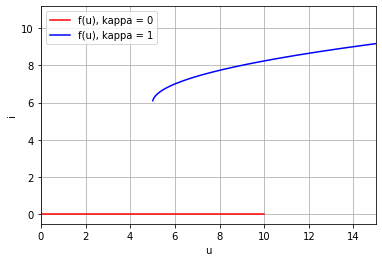

In [103]:
kappa = 0
plt.plot(u_space_0, [f(u) for u in u_space_0], color="red", label="f(u), kappa = 0")
kappa = 1
plt.plot(u_space_1, [f(u) for u in u_space_1], color="blue", label="f(u), kappa = 1")

plt.grid()
plt.legend(loc="best")
plt.xlim(left = 0, right = uz + 5)
plt.xlabel("u")
plt.ylim(bottom = -0.5, top = f(uz + 5) + 2)
plt.ylabel("i")
plt.show()

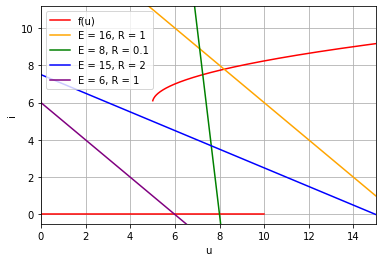

In [104]:
kappa = 0
plt.plot(u_space_0, [f(u) for u in u_space_0], color="red")
kappa = 1
plt.plot(u_space_1, [f(u) for u in u_space_1], color="red", label="f(u)")

Es_and_Rs = []

E, R = 16, 1
plt.plot(u_space, [(E - u)/R for u in u_space], color = "orange", label=f"E = {E}, R = {R}")
Es_and_Rs.append([E, R])

E, R = 8, 0.1
plt.plot(u_space, [(E - u)/R for u in u_space], color = "green", label=f"E = {E}, R = {R}")
Es_and_Rs.append([E, R])

E, R = 15, 2
plt.plot(u_space, [(E - u)/R for u in u_space], color = "blue", label=f"E = {E}, R = {R}")
Es_and_Rs.append([E, R])

E, R = 6, 1
plt.plot(u_space, [(E - u)/R for u in u_space], color = "purple", label=f"E = {E}, R = {R}")
Es_and_Rs.append([E, R])

plt.grid()
plt.legend(loc="best")
plt.xlim(left = 0, right = uz + 5)
plt.xlabel("u")
plt.ylim(bottom = -0.5, top = f(uz + 5) + 2)
plt.ylabel("i")
plt.show()

In [105]:
def phase_portrait(u0, h, kappa=kappa, E=1, R=1, C=1):
    t_space = np.linspace(0, 30, num=int(30/h))
    u_values = []
    for t in t_space:
        u = euler(u0, h=h, E=E, R=R, C=C)
        u_values.append(u)
        u0 = u
        
    plt.plot(t_space, u_values)
    plt.grid()
    plt.xlim(left = 0, right = uz + 5)
    plt.xlabel("t")
    plt.ylabel("u")
    plt.show()
    
    

1) Параметры: E = 16, R = 1, C = 1

  1. Начальные условия: u0 = 0, лампа выключена


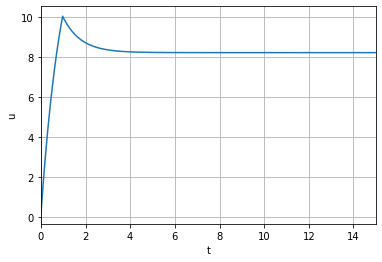

      Итог: Лампа включена


  2. Начальные условия: u0 = 9.99, лампа выключена


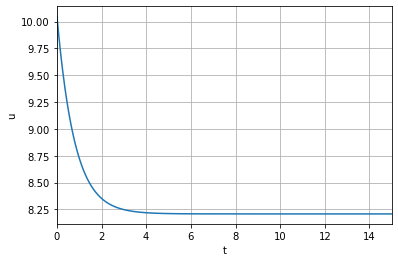

      Итог: Лампа включена


  3. Начальные условия: u0 = 15, лампа включена


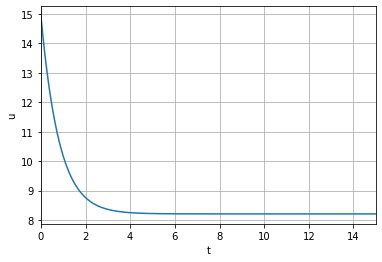

      Итог: Лампа включена


  4. Начальные условия: u0 = 5.01, лампа включена


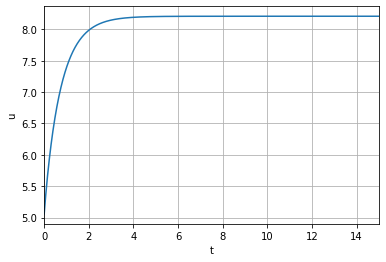

      Итог: Лампа включена


2) Параметры: E = 8, R = 0.1, C = 1

  1. Начальные условия: u0 = 0, лампа выключена


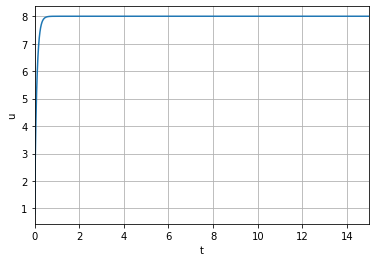

      Итог: Лампа выключена


  2. Начальные условия: u0 = 9.99, лампа выключена


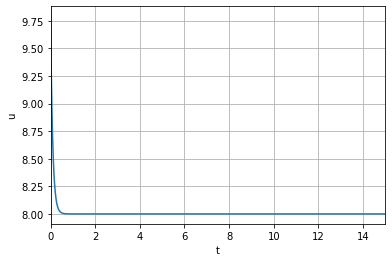

      Итог: Лампа выключена


  3. Начальные условия: u0 = 15, лампа включена


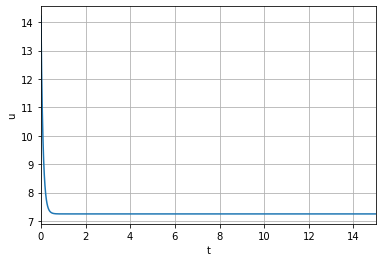

      Итог: Лампа включена


  4. Начальные условия: u0 = 5.01, лампа включена


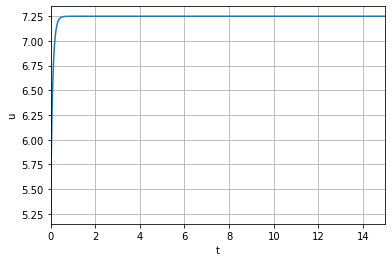

      Итог: Лампа включена


3) Параметры: E = 15, R = 2, C = 1

  1. Начальные условия: u0 = 0, лампа выключена


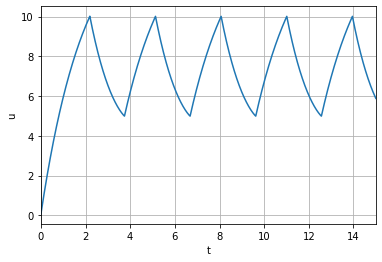

      Итог: Лампа мигает


  2. Начальные условия: u0 = 9.99, лампа выключена


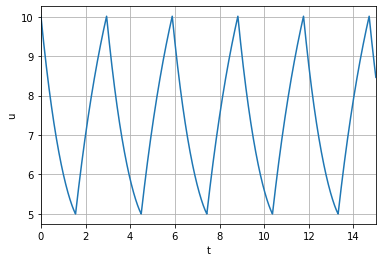

      Итог: Лампа мигает


  3. Начальные условия: u0 = 15, лампа включена


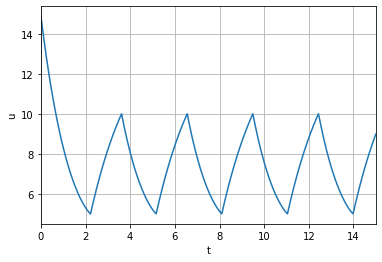

      Итог: Лампа мигает


  4. Начальные условия: u0 = 5.01, лампа включена


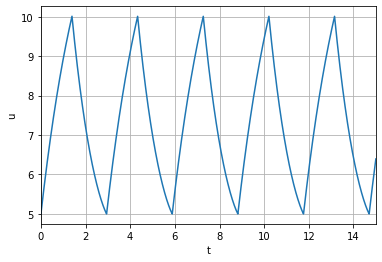

      Итог: Лампа мигает


4) Параметры: E = 6, R = 1, C = 1

  1. Начальные условия: u0 = 0, лампа выключена


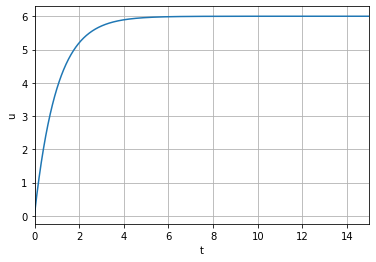

      Итог: Лампа выключена


  2. Начальные условия: u0 = 9.99, лампа выключена


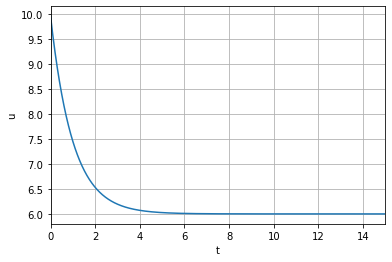

      Итог: Лампа выключена


  3. Начальные условия: u0 = 15, лампа включена


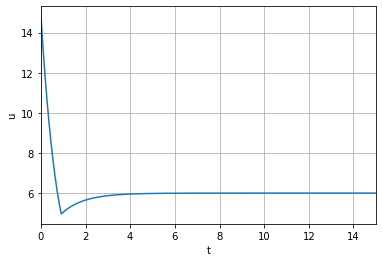

      Итог: Лампа выключена


  4. Начальные условия: u0 = 5.01, лампа включена


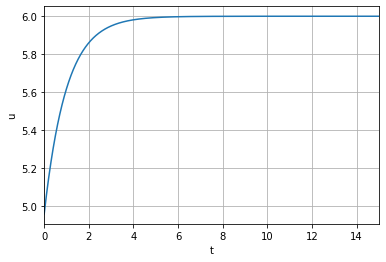

      Итог: Лампа выключена




In [106]:
h = 0.01
lamp = ["выключена", "включена"]
i = 1
u0s_and_kappas = [[0, 0], [uz - h, 0], [uz + 5, 1], [ug + h, 1]]
for E, R in Es_and_Rs:
    print("{}) Параметры: E = {}, R = {}, C = {}\n".format(i, E, R, 1))
    j = 1
    for u0, kappa in u0s_and_kappas:
        print("  {}. Начальные условия: u0 = {}, лампа {}".format(j, u0, lamp[kappa]))
        phase_portrait(u0, h, kappa=kappa, E=E, R=R, C=1)
        if [E, R] == Es_and_Rs[2]:
            print("      Итог: Лампа мигает\n\n")
        else:
            print("      Итог: Лампа {}\n\n".format(lamp[kappa]))
        j+=1
    i+=1